In [78]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
df=pd.read_csv("Mall_Customers.csv")

In [4]:
df.head(6)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [45]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


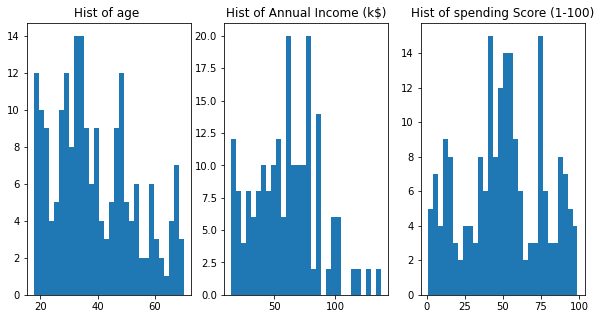

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(10,5))
ax[0].hist(df["Age"],bins=30)
ax[1].hist(df["Annual Income (k$)"],bins=30)
ax[2].hist(df["Spending Score (1-100)"],bins=30);
ax[0].set_title("Hist of age ")
ax[1].set_title("Hist of Annual Income (k$)")
ax[2].set_title("Hist of spending Score (1-100)");

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


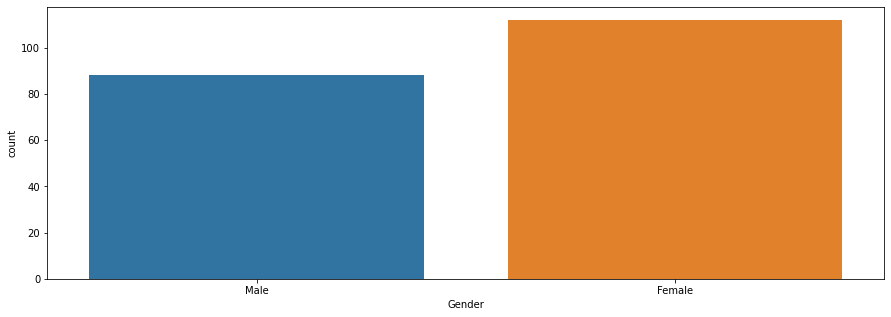

In [81]:
plt.figure(1,figsize=(15,5))
sns.countplot(df["Gender"]);

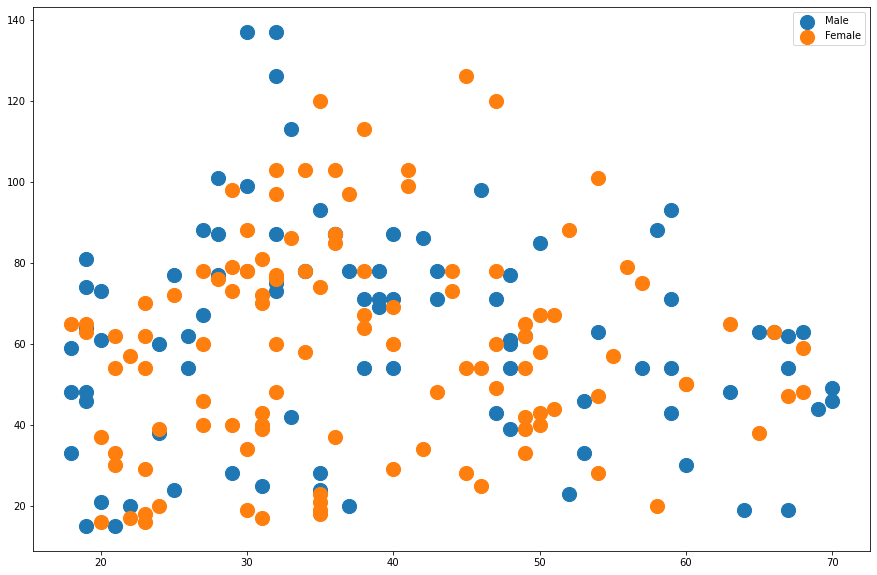

In [94]:
plt.figure(1,figsize=(15,10))
for gender in ["Male","Female"]:
    plt.scatter("Age","Annual Income (k$)",data=df[df["Gender"]==gender],s=200,label=gender)
plt.xlabel("")
plt.xlabel('Age');plt.ylabel("Annual Income (k$)")
plt.title()
plt.legend();    

In [82]:
#2 features 
X=df.iloc[:,[3,4]].values

In [83]:
#elbow_method
from sklearn.cluster import KMeans 
a=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in np.arange(1,21):
    kms = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kms.fit(X)
    a.append(kms.inertia_)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


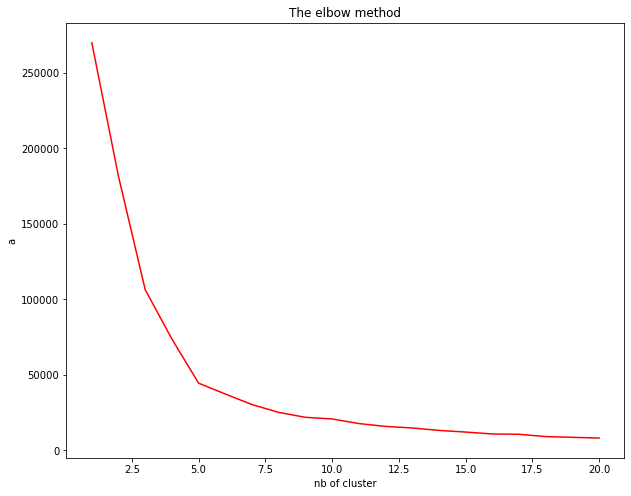

In [84]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(1,21),a,"red")
plt.title('The elbow method')
plt.xlabel('nb of cluster')
plt.ylabel("a");

In [36]:
#model build
model=KMeans(n_clusters=5,init="k-means++",random_state=4)
modelpa=model.fit_predict(X)

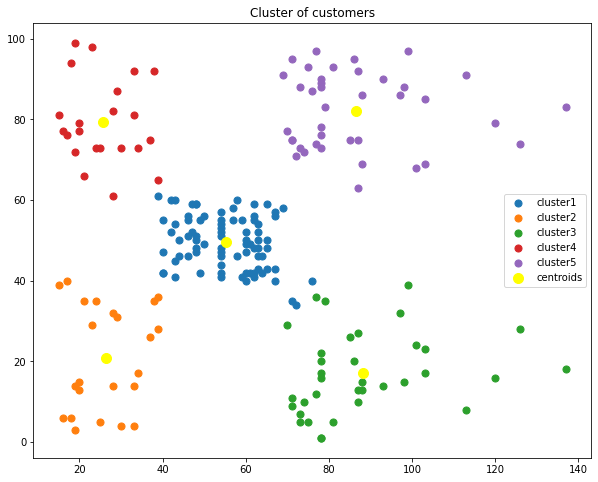

In [44]:
plt.figure(figsize=(10,8))
index=['cluster1','cluster2','cluster3','cluster4','cluster5']
for i in np.arange(0,5):
    plt.scatter(X[modelpa==i,0],X[modelpa==i,1],50,label=index[i])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],100,color="yellow",label="centroids")
plt.title('Cluster of customers')
plt.legend();